# Exercises of the ninth week

In [1]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy as sp

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Initial guess	 Optimisation result		 Success	 Function value
[-2.0, -1.0] 	 [ 0.08984201 -0.71265641] 	 True 		 -1.031628453489877
[-2.0, -0.5] 	 [ 0.08984201 -0.71265641] 	 True 		 -1.0316284534898768
[-2.0, 0.0] 	 [-0.08984202  0.7126564 ] 	 True 		 -1.0316284534898765
[-2.0, 0.5] 	 [-0.08984205  0.71265635] 	 True 		 -1.031628453489851
[-2.0, 1.0] 	 [-0.08984202  0.7126564 ] 	 True 		 -1.031628453489877
[-1.5, -1.0] 	 [-1.70360672  0.79608359] 	 True 		 -0.21546382438371214
[-1.5, -0.5] 	 [-1.60710476 -0.56865146] 	 True 		 2.1042503103112584
[-1.5, 0.0] 	 [-1.70360672  0.79608357] 	 True 		 -0.21546382438371747
[-1.5, 0.5] 	 [-1.70360672  0.79608356] 	 True 		 -0.21546382438371736
[-1.5, 1.0] 	 [-1.70360671  0.79608356] 	 True 		 -0.21546382438371703
[-1.0, -1.0] 	 [-0.08984198  0.71265633] 	 True 		 -1.0316284534898346
[-1.0, -0.5] 	 [ 0.08984201 -0.71265641] 	 True 		 -1.0316284534898765
[-1.0, 0.0] 	 [-0.08984202  0.71265639] 	 True 		 -1.0316284534898763
[-1.0, 0.5] 	 [-0.08984

<Figure size 576x360 with 0 Axes>

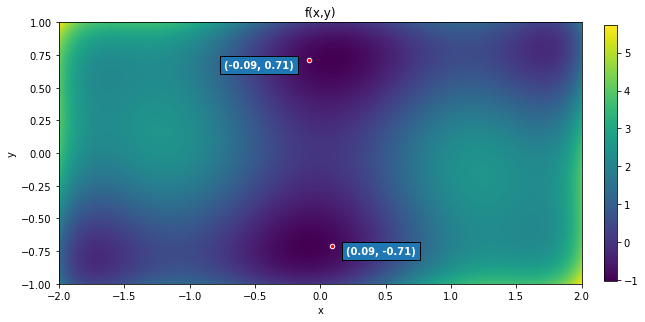

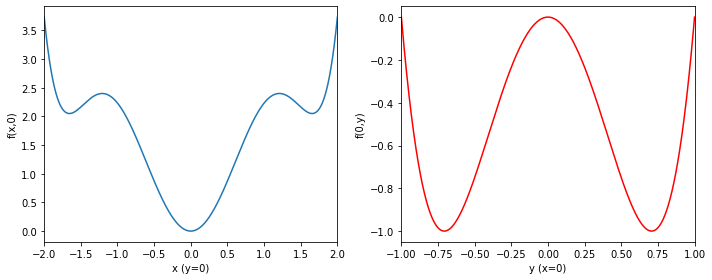

In [2]:
# The function
def f(c):
    cc = c.copy()
    x=cc[0]
    y=cc[1]
    return (4-(2.1*(x**2))+((x**4)/3))*(x**2)+(x*y)+((4*(y**2)-4)*(y**2))

# The axis
x = np.linspace(-2, 2, 4000)
y = np.linspace(-1, 1, 2000)

# Basically makes a grid over the considered domain, putting the x coordinates of each point in an array and the y coordinates in another
X, Y = np.meshgrid(x, y)

edge = np.min(x), np.max(x), np.min(y), np.max(y)
fig = plt.figure(figsize=(8,5))
Z = f([X, Y])

# Plot the 2D function
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
im = ax.imshow(Z, interpolation="bilinear", extent=edge)
pylab.colorbar(im,fraction=0.023, pad=0.04)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("f(x,y)")

# Plot of the function fixing y=0 and x=0 to help having an idea of the function
fig2, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax1.plot(x, f([x,0]))
ax1.set_xlabel("x (y=0)")
ax1.set_ylabel("f(x,0)")
ax1.set_xlim(-2,2)
ax2.plot(y, f([0,y]), color="r")
ax2.set_xlabel("y (x=0)")
ax2.set_ylabel("f(0,y)")
ax2.set_xlim(-1,1)
plt.tight_layout()

# Making a grid of points where to start the minimisation process from
x_0 = np.linspace(-2, 2, 9)
y_0 = np.linspace(-1, 1, 5)
grid = np.array([[[i,j] for j in y_0] for i in x_0])

# Minimisation
results = [[sp.optimize.minimize(f, x0=(i,j), tol=1e-6) for j in y_0] for i in x_0]
optpts = []
fmin = 999

# Output of the minimisation
print("Initial guess\t Optimisation result\t\t Success\t Function value")
for i in range(9):
    for j in range(5):
        print([x_0[i],y_0[j]], "\t", results[i][j].x, "\t", results[i][j].success, "\t\t", results[i][j].fun)
        opt = np.array([results[i][j].x[0], results[i][j].x[1]])
        overlap = False
        for o in optpts:    # check if the considered minimum obtained starting from (x,y) does overlap with other already considered considered minima
            if np.allclose(np.array([o[0], o[1]]), opt):
                overlap = True
        if not overlap:
            optpts.append([results[i][j].x[0], results[i][j].x[1], results[i][j].fun])
            if results[i][j].fun < fmin:
                fmin = results[i][j].fun
                
optpts = np.array(optpts) # List into array (array of local & global minima)

# Global minima search
glbmin = []
for i in range(optpts.shape[0]):
    if np.allclose(optpts[i,2],fmin):
        glbmin.append(list(optpts[i]))
glbmin = np.array(glbmin)
for o in glbmin:
    ax.scatter(o[0], o[1], s=20, c="r", edgecolors="w", marker="o")

# Adding minima points to the plot
ax.text(0.2, -0.71, "(0.09, -0.71)", backgroundcolor=None, ha="left", va="top", weight="bold", color="w")
ax.text(-0.2, 0.71, "(-0.09, 0.71)", backgroundcolor=None, ha="right", va="top", weight="bold", color="w")

# Output
print("\nThe global minima are " + str(glbmin.shape[0]) + ", precisely:")
for i in range(glbmin.shape[0]):
    print(" " + str(np.around(glbmin[i,:2],6)))
print("where the function value is " + str(np.around(fmin,5)) + ".\n")
print("(0,0) is an unstable stationary point as could also be seen from the plots below.")
plt.show()

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

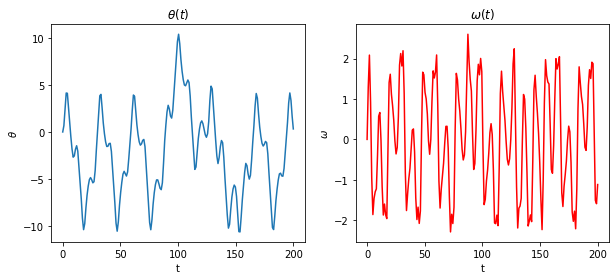

In [3]:
# Parameters
Q = 2.0
d = 1.5
Omega = 0.65
ini = (0, 0)
t = np.linspace(0, 200, 200)

# ODE
def der(X, t, Q, d, Omega):
    return (X[1], -(X[1]/Q)+np.sin(X[0])+(d*np.cos(Omega*t)))

# Solving the ODE
odesol = sp.integrate.odeint(der, ini, t, args=(Q, d, Omega))

# Plot of angle theta and angular speed omega
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax1.plot(t, odesol[:,0])
ax1.set_title(r"$\theta(t)$")
ax1.set_xlabel("t")
ax1.set_ylabel(r"$\theta$")
ax2.plot(t, odesol[:,1], color="r")
ax2.set_title(r"$\omega(t)$")
ax2.set_xlabel("t")
ax2.set_ylabel("$\omega$")

plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


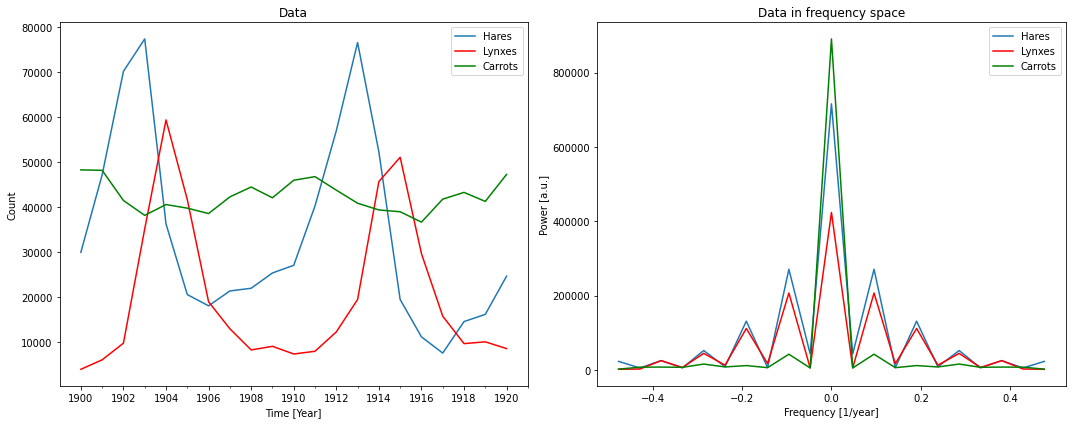

In [4]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# loading data
data = np.loadtxt("../data/populations.txt")
years, hares, lynxes, carrots = data.T
tstep=1

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

# Hares
ax1.plot(years, hares, label="Hares")    # plotting the data
ax1.set_title("Data")
ax1.set_xlabel("Time [Year]")
ax1.set_ylabel("Count")
haresfft = np.abs(sp.fftpack.fft(hares))    # fast fourier transform of the data, get the weight of each frequency
freqh = sp.fftpack.fftfreq(haresfft.size)    # sample frequencies
ax2.plot(sp.fftpack.fftshift(freqh), sp.fftpack.fftshift(haresfft), label="Hares")   # plot the frequencies spectrum shifting 0 to the center of the spectrum, otherwise the plot is not correct
ax2.set_title("Data in frequency space")
ax2.set_xlabel("Frequency [1/year]")
ax2.set_ylabel("Power [a.u.]")

# Lynxes
ax1.plot(years, lynxes, color="r", label="Lynxes")
lynxesfft = np.abs(sp.fftpack.fft(lynxes))
freql = sp.fftpack.fftfreq(lynxesfft.size)
ax2.plot(sp.fftpack.fftshift(freql), sp.fftpack.fftshift(lynxesfft), color="r", label="Lynxes")

# Carrots
ax1.plot(years, carrots, color="g", label="Carrots")
carrotsfft = np.abs(sp.fftpack.fft(carrots))
freqc = sp.fftpack.fftfreq(carrotsfft.size)
ax2.plot(sp.fftpack.fftshift(freqc), sp.fftpack.fftshift(carrotsfft), color="g" , label="Carrots")

ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))

ax1.legend()
ax2.legend()
print(data)
fig.tight_layout()
plt.show()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Filtered picture')

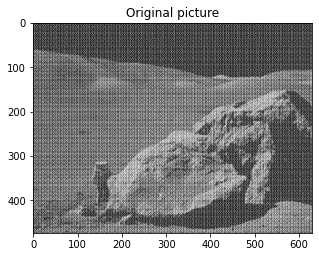

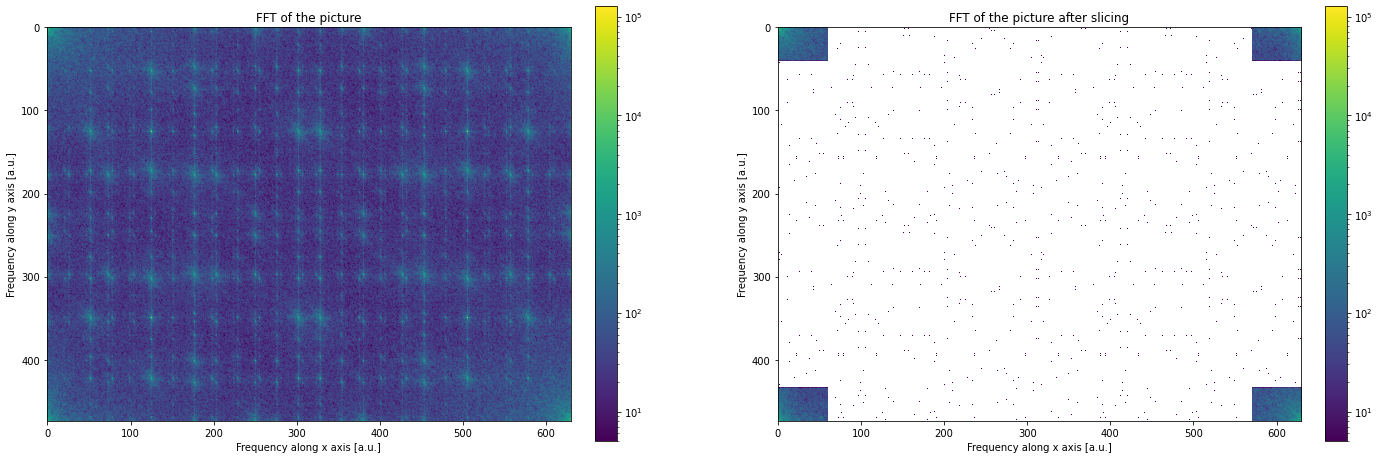

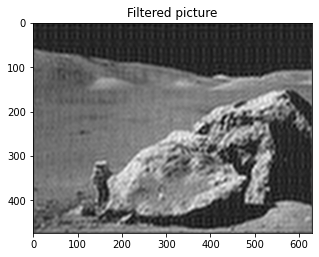

In [5]:
pic = plt.imread("../images/moonlanding.png")

# Plot of the noisy picture
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
ax0.imshow(pic, cmap="gray")
ax0.set_title("Original picture")

# FFT of the picture
picfft = sp.fftpack.fft2(pic)

# Plot the frequencies spectrum
fig2, (ax1,ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(24,8))
im1 = ax1.imshow(np.abs(picfft), norm=LogNorm(vmin=5))
pylab.colorbar(im1,fraction=0.1, pad=0.04)
ax1.set_title("FFT of the picture")
ax1.set_xlabel("Frequency along x axis [a.u.]")
ax1.set_ylabel("Frequency along y axis [a.u.]")

#picfft[np.abs(picfft) > 3000] = 0 would be another method applying a threshold on the power of the signal

# But we were asked to use slicing therefore:
picfft[40:434] = 0
picfft[:, 60:570] = 0

# Plot of the cut frequency spectrum
im2 = ax2.imshow(np.abs(picfft), norm=LogNorm(vmin=5))
pylab.colorbar(im2,fraction=0.1, pad=0.04)
ax2.set_title("FFT of the picture after slicing")
ax2.set_xlabel("Frequency along x axis [a.u.]")
ax2.set_ylabel("Frequency along y axis [a.u.]")

# Inverse FFT to convert back to picture after cut
picfil = sp.fftpack.ifft2(picfft)

# Plot picture
fig3, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
ax3.imshow(picfil.real, cmap="gray")
ax3.set_title("Filtered picture")